#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

### Model Training

In [5]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import RandomizedSearchCV

import warnings

In [6]:
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

### Import the csv Data as Pandas DataFrame

In [7]:
df = pd.read_csv('data/stud.csv')

In [8]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [10]:
## dividing independent and dependent features

X = df.drop(columns=['math_score'], axis=1)

In [11]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [12]:
X.shape

(1000, 7)

In [13]:
y = df['math_score']

In [14]:
## Create a Column Transformer with 3 types of transformers

num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features)
    ]
)



In [15]:
X = preprocessor.fit_transform(X)

In [16]:
X.shape

(1000, 19)

In [17]:
## seperate the dataset into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train.shape, X_test.shape

((670, 19), (330, 19))

### Create an Evaluate Function to give all metrics after model training

In [21]:
def evalute_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [23]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    #Evaluate Train and test dataset
    model_train_mae,model_train_mse,model_train_rmse, model_train_r2 = evalute_model(y_train, y_train_pred)
    model_test_mae, model_test_mse, model_test_rmse, model_test_r2 = evalute_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Sqaured Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Sqaured Error: 5.2715
- Mean Absolute Error: 4.2082
- R2 Score: 0.8751
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.4846
- Mean Absolute Error: 4.3616
- R2 Score: 0.8761


Lasso
Model performance for Training set
- Root Mean Sqaured Error: 6.5393
- Mean Absolute Error: 5.1801
- R2 Score: 0.8077
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.8057
- Mean Absolute Error: 5.3547
- R2 Score: 0.8092


Ridge
Model performance for Training set
- Root Mean Sqaured Error: 5.2696
- Mean Absolute Error: 4.2073
- R2 Score: 0.8752
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.4951
- Mean Absolute Error: 4.3670
- R2 Score: 0.8756


K-Neighbors Regressor
Model performance for Training set
- Root Mean Sqaured Error: 5.7037
- Mean Absolute Error: 4.5872
- R2 Score: 0.8537
-----------------------

In [24]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"], ascending=False)

,Model Name,R2_Score
0,Linear Regression,0.876079
2,Ridge,0.875602
7,CatBoosting Regressor,0.858163
5,Random Forest,0.847737
8,AdaBoost Regressor,0.837475
6,XGBRegressor,0.825863
1,Lasso,0.809187
3,K-Neighbors Regressor,0.777768
4,Decision Tree,0.722776


### Linear Regression

In [25]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print("Accuracy of the model is %.2f" %score)

Accuracy of the model is 87.61


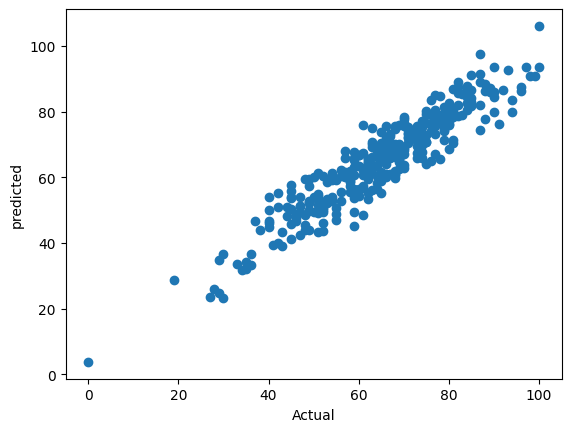

In [26]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("predicted")
plt.show()

## Regression Plot (Regplot)

<Axes: xlabel='math_score'>

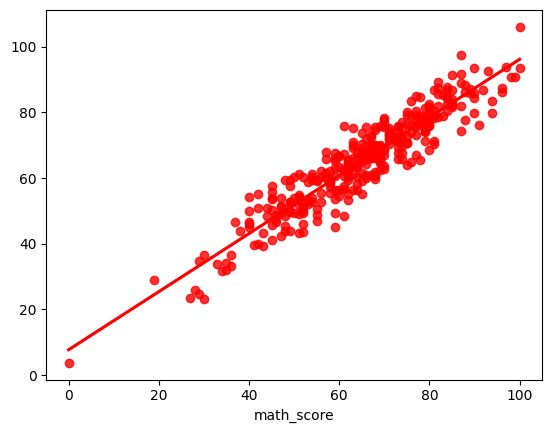

In [29]:
## ci = confidence interval, it sets the shaded area around the regression line that shows uncertainty

sns.regplot(x=y_test, y=y_pred,ci=None, color='red')

### Difference between Actual and Predicted values

In [30]:
pred_df = pd.DataFrame({'Actual Value': y_test, 'Predicted_value': y_pred, 'Difference': y_test-y_pred})
pred_df

,Actual Value,Predicted_value,Difference
521,91,76.265625,14.734375
737,53,58.687500,-5.687500
740,80,76.984375,3.015625
660,74,76.984375,-2.984375
411,84,87.656250,-3.656250
...,...,...,...
506,68,74.734375,-6.734375
342,69,65.312500,3.687500
485,70,78.359375,-8.359375
711,80,79.812500,0.187500
